# Operation Class
### Input node
### Output node
### Global Default Graph Variable
### Compute
#### =>Overwritten by extended classes

In [1]:
#Base operation class
class Operation():
    def __init__(self, input_nodes=[]):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            #Grab the output_nodes for that particular node and then append -> self
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
            
    def compute(self):
        pass

In [2]:
class add(Operation):
    def __init__(self, x, y):
        super().__init__([x, y])
    
    #Overwrite the compute function in operation class
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var + y_var

In [3]:
class multiply(Operation):
    def __init__(self, x, y):
        super().__init__([x, y])
    
    #Overwrite the compute function in operation class
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var * y_var

In [4]:
class matmul(Operation):
    def __init__(self, x, y):
        super().__init__([x, y])
    
    #Overwrite the compute function in operation class
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var.dot(y_var)

# Placeholder 
## An 'empty' node that need a value to be provided to compute output

# Variables
## Changable parameter of Graph

# Graph
## Global variable connecting variables and placeholders to operations together

In [5]:
class placeholder():
    def __init__(self):
        self.output_nodes = []
        
        #Append placeholder to the graph
        _default_graph.placeholders.append(self)   # _default_graph is a global object

In [6]:
class variable():
    def __init__(self, initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        
        #Append variable to the graph
        _default_graph.variables.append(self)      # _default_graph is a global object

In [7]:
class graph():
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        global _default_graph
        _default_graph = self

z = Ax + b

A = 10

b = 1

=> z = 10x + 1

In [8]:
g = graph()
g.set_as_default()

A = variable(10)
b = variable(1)

x = placeholder()

In [9]:
z = add(multiply(A, x), b)

In [10]:
def traverse_postorder(operation):
    #Make sure computations are done in the correct order (Ax first, then Ax + b)
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
        
    recurse(operation)
    return nodes_postorder

In [11]:
type(x)

__main__.placeholder

In [12]:
import numpy as np
#The placeholder still waiting for providing a value to calculate
#So we have to create a class Session to feed_dict the value to placeholder
class Session():
    
    def run(self, operation, feed_dict={}):
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == placeholder:
                node.output = feed_dict[node]
                
            elif type(node) == variable:
                node.output = node.value
                
            else:
                #Operation
                node.inputs = [input_node.output for input_node in node.input_nodes]
                
                node.output = node.compute(*node.inputs) #Asterix without knowing how many inputs throughout the operation
                
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output

In [13]:
sess = Session()
result = sess.run(operation=z, feed_dict={x: 10})
result

101

In [14]:
g = graph()
g.set_as_default()

A = variable([ [10,20],[30,40] ])
b = variable([1,2])

x = placeholder()

z = add(matmul(A,x),b)

In [15]:
sess = Session()
sess.run(operation=z, feed_dict={x: 10})

array([[101, 202],
       [301, 402]])

# Classification

# Activation function

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [18]:
sample_z = np.linspace(start=-10, stop=10, num=100)
sample_z

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [19]:
sample_a = sigmoid(sample_z)
sample_a

array([4.53978687e-05, 5.55606489e-05, 6.79983174e-05, 8.32200197e-05,
       1.01848815e-04, 1.24647146e-04, 1.52547986e-04, 1.86692945e-04,
       2.28478855e-04, 2.79614739e-04, 3.42191434e-04, 4.18766684e-04,
       5.12469082e-04, 6.27124987e-04, 7.67413430e-04, 9.39055039e-04,
       1.14904229e-03, 1.40591988e-03, 1.72012560e-03, 2.10440443e-03,
       2.57431039e-03, 3.14881358e-03, 3.85103236e-03, 4.70911357e-03,
       5.75728612e-03, 7.03711536e-03, 8.59898661e-03, 1.05038445e-02,
       1.28252101e-02, 1.56514861e-02, 1.90885420e-02, 2.32625358e-02,
       2.83228820e-02, 3.44451957e-02, 4.18339400e-02, 5.07243606e-02,
       6.13831074e-02, 7.41067363e-02, 8.92170603e-02, 1.07052146e-01,
       1.27951705e-01, 1.52235823e-01, 1.80176593e-01, 2.11963334e-01,
       2.47663801e-01, 2.87185901e-01, 3.30246430e-01, 3.76354517e-01,
       4.24816868e-01, 4.74768924e-01, 5.25231076e-01, 5.75183132e-01,
       6.23645483e-01, 6.69753570e-01, 7.12814099e-01, 7.52336199e-01,
      

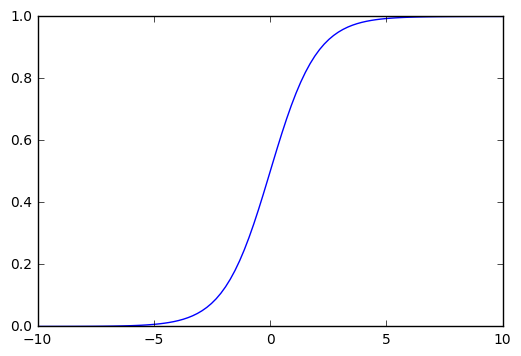

In [20]:
plt.plot(sample_z, sample_a)

In [21]:
class sigmoid(Operation):
    
    def __init__(self, z):
        super().__init__([z])
        
    def compute(self, z_val):
        return 1 / (1+np.exp(-z_val))

In [22]:
from sklearn.datasets import make_blobs

In [23]:
data = make_blobs(n_samples=50 , n_features=2, centers=2, random_state=75)

In [24]:
features = data[0]
labels = data[1]

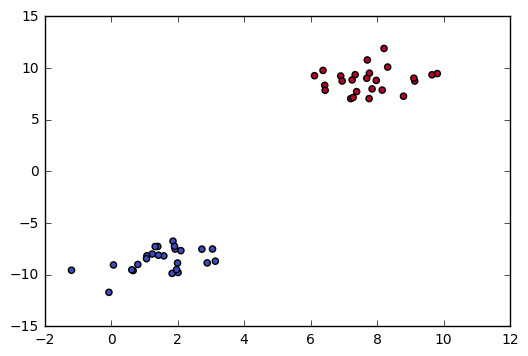

In [25]:
plt.scatter(x=features[:,0], y=features[:,1], c=labels, cmap='coolwarm')

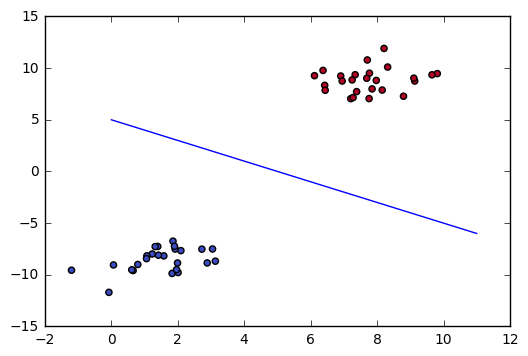

In [26]:
x = np.linspace(0, 11, 10)
y = -x + 5
plt.scatter(x=features[:,0], y=features[:,1], c=labels, cmap='coolwarm')
plt.plot(x, y)

# (1,1) * f - 5 = 0

In [27]:
#Classified in red blobs (positive)
np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

In [28]:
#Classified in blue blobs (negative)
np.array([1,1]).dot(np.array([[2],[-10]])) - 5

array([-13])

In [29]:
g = graph()
g.set_as_default()

In [30]:
x = placeholder()
weight = variable([1,1])
b = variable(-5)

z = add(matmul(weight, x), b)

In [31]:
#Output 0 or 1
a = sigmoid(z)

In [32]:
sess = Session()
sess.run(operation=a, feed_dict={x: [8,10]})

0.999997739675702

In [33]:
sess.run(operation=a, feed_dict={x: [0,-10]})

3.059022269256247e-07